### The last layer in ALBERT has some 'fingers' sticking out

The red line is at the 10th eigenvalue from the top

In [ ]:
plt.hist(np.log10(esd), bins=100, log=True, density=True);
plt.axvline(np.log10(esd[-10]), color='red', label=r"$\lambda_{10}$");
plt.title(r"ALBERT last layer , $\alpha\sim1.75$ ")
plt.legend()
plt.xlabel(r"Log Eigenvalues $\log_{10}\lambda$")
plt.ylabel("Density")

### If we cut off the last few eigenvalues, and redo the powerlsw fit, alpha does not change much

Which is a good sign for the stabilty

In [ ]:
import powerlaw
for n in range(1, 50):
    fit = powerlaw.Fit(esd[:-n])
    print(n, fit.alpha, fit.sigma, fit.D)

### What does it mean for $\alpha < 2$ then  ?

- is this layer a bit overfit ?

- is it atypical ?

In [ ]:
W = watcher.get_Weights(layer=26)[0]

In [ ]:
W.shape

###  if W has converged, we should  be able to fit it elementwise to a Lapacian distribution

In [ ]:
from scipy.stats import kstest, laplace
import numpy as np

def fit_laplacian(W, plot=True, sample_size=10000):
    """Fits the elements of a matrix W to a Laplacian density
    
    Returns the parameters of the fit and quality
    
    """
    W_elements = W.flatten()
    loc, scale = laplace.fit(W_elements)
    
    # Create theoretical Laplacian distribution
    lap_dist = laplace(loc, scale)

    D, p = kstest(W_elements, lap_dist.cdf)

    if plot:
        # sample from W
        data = np.random.choice(W_elements, size=sample_size, replace=True)
        plt.hist(data, bins=1000, density=True, alpha=0.6, color='b', label='Sample Data')


        # Plot the fitted Laplacian distribution
        x = np.linspace(lap_dist.ppf(0.01), lap_dist.ppf(0.99), 100)
        plt.plot(x, lap_dist.pdf(x), 'r-', lw=2, alpha=0.6, label='Fitted Laplacian')
    
        plt.legend()
        plt.show()
        
        
    print(f"loc={loc:0.2f} scale={scale:0.2f} D={D:0.2f} p={p:0.2f}")
    
    return loc, scale, D, p
    

In [ ]:
loc, scale, D, p = fit_laplacian(W)

In [ ]:
layer_ids = details.layer_id.to_numpy()

In [ ]:
laplacian_scales = []
laplacian_Ds = []
max_W = []

for layer_id in layer_ids:
    W = watcher.get_Weights(layer=layer_id)[0];
    loc, scale, D, p = fit_laplacian(W, plot=False);
    laplacian_scales.append(scale)
    laplacian_Ds.append(D)
    max_W.append(np.max(np.abs(W)))

In [ ]:
plt.scatter(details.alpha.to_numpy(), max_W)
plt.xlim(1,5)
plt.xlabel(r"Power Law fit: alpha $\alpha$")
plt.ylabel("Laplacian fit: scale")
plt.title("ALBERT: Power Law fit vs Laplacian fit")

In [ ]:
plt.scatter(details.alpha.to_numpy(), max_W)
plt.xlabel(r"Power Law fit: alpha $\alpha$")
plt.ylabel("max W")
plt.title("ALBERT: Power Law fit vs Max W")


In [ ]:
for alpha, scale in zip(details.alpha.to_numpy(), laplacian_scales):
    lap_dist = laplace(0.0, scale)
    
    #if alpha < 6 and alpha > 1.5:

    if alpha> 4 or alpha < 2 or (alpha > 3 and alpha < 3.07):
        # Plot the fitted Laplacian distribution
        x = np.linspace(lap_dist.ppf(0.01), lap_dist.ppf(0.99), 100)
        plt.plot(x, lap_dist.pdf(x),  lw=2, alpha=0.6, label=r"$\alpha=$"+f"{alpha:0.2f}")

plt.title("Laplacian fits for  few ALBERT layers"            )
plt.legend()
plt.show()

In [ ]:
for alpha, scale in zip(details.alpha.to_numpy(), laplacian_scales):
    lap_dist = laplace(0.0, scale)
    

    # Plot the fitted Laplacian distribution
    if alpha < 2:
        x = np.linspace(lap_dist.ppf(0.01), lap_dist.ppf(0.99), 100)
        plt.plot(x, lap_dist.pdf(x),  lw=2, alpha=0.6, label=r"$\alpha=$"+f"{alpha:0.2f}")

plt.title("Laplacian fits for  few ALBERT layers"            )
plt.legend()
plt.show()

In [ ]:
plt.scatter(laplacian_scales, max_W)
plt.xlabel(r"laplacian_scales")
plt.ylabel("max W")
plt.title("ALBERT: Max W vs Laplacian fit")
#plt.ylim(0,2)

In [ ]:
plt.scatter(laplacian_scales, max_W)
plt.xlabel(r"laplacian_scales")
plt.ylabel("max W")
plt.title("ALBERT: Max W vs Laplacian fit")
plt.ylim(0,2)

In [ ]:
details

In [ ]:
watcher.analyze(layers=[26], plot=True)

In [ ]:
esd = watcher.get_ESD(layer=17)

In [ ]:
plt.hist(esd, log=True, bins=100);

In [ ]:
plt.hist(np.log10(esd), log=True, bins=100);

In [ ]:

plt.hist(np.log10(esd[esd>10]), log=True, bins=100);

In [ ]:
details_17_xxlarge = watcher.analyze(layers=[17], fix_fingers='xmin_peak', xmin_max = 15, plot=True)

### VGG


In [1]:
import weightwatcher as ww
import logging

In [2]:
import torchvision.models as models
model = models.vgg11(weights='VGG11_Weights.IMAGENET1K_V1')
watcher = ww.WeightWatcher(model=model, log_level=logging.WARNING)



python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1


In [ ]:
details = watcher.analyze(layers=[5], plot=True)
details.alpha.to_numpy()[0]

In [ ]:
details = watcher.analyze(layers=[5], plot=True, fix_fingers='xmin_peak', xmin_max=1.0)
details.alpha.to_numpy()[0]

max N = 10
Calculating best minimal value for power law fit


Assuming nested distributions


Assuming nested distributions


checking alpha


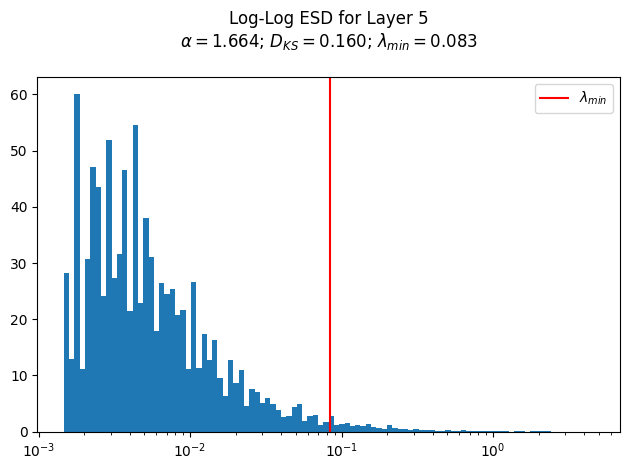

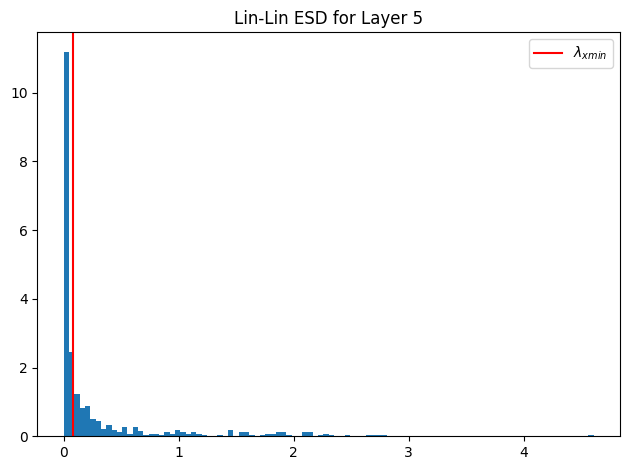

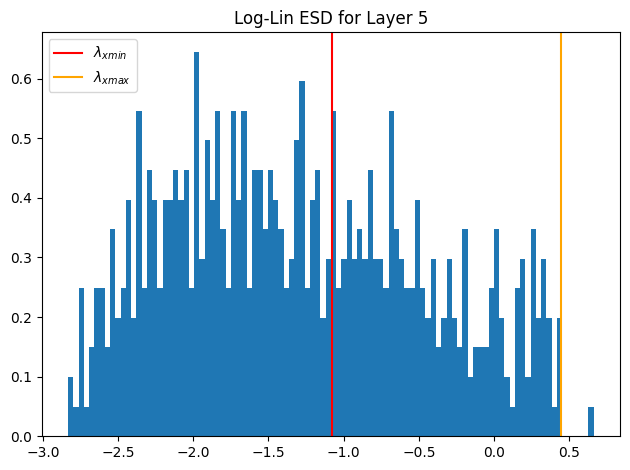

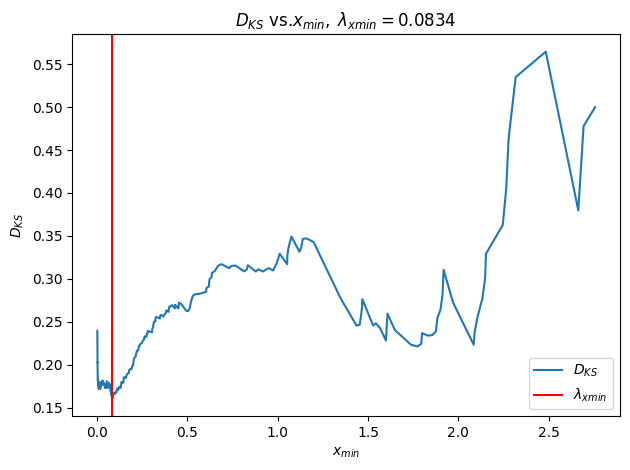

,layer_id,name,D,Lambda,M,N,Q,alpha,alpha_weighted,best_fit,...,rank_loss,rf,sigma,spectral_norm,stable_rank,sv_max,warning,weak_rank_loss,xmax,xmin
0,5,Conv2d,0.160178,-1.0,64.0,128.0,2.0,1.663549,1.103673,power_law,...,0.0,9.0,0.043945,4.607285,34.178218,2.146459,over-trained,0.0,2.796751,0.083414


<Figure size 640x480 with 0 Axes>

In [3]:
details = watcher.analyze(layers=[5], fix_fingers='clip_xmax', plot=True)
details

In [6]:
details = watcher.describe()
len(details)


11